# **<span style="color: orange;">Comparison of all Models Performances</span>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
# Start time
start_time = time.time()

# Loading transformer model evaluation since the structure here needs to be changed to be similar to the other xsls files below
df_transformer = pd.read_csv('combined_evaluation.csv')

In [2]:
df_transformer

,Model,Prediction Count - Class 1,Prediction Count - Class 0,Class 0 - precision,Class 0 - recall,Class 0 - f1-score,Class 0 - support,Class 1 - precision,Class 1 - recall,Class 1 - f1-score,Class 1 - support,accuracy,macro avg - precision,macro avg - recall,macro avg - f1-score,macro avg - support,weighted avg - precision,weighted avg - recall,weighted avg - f1-score,weighted avg - support
0,distilbert-base-uncased-10-epochs,565,135,0.659259,0.415888,0.510029,214.0,0.778761,0.905350,0.837298,486.0,0.755714,0.719010,0.660619,0.673663,700.0,0.742228,0.755714,0.737247,700.0
1,distilbert-base-uncased-5-epochs,534,166,0.590361,0.457944,0.515789,214.0,0.782772,0.860082,0.819608,486.0,0.737143,0.686566,0.659013,0.667699,700.0,0.723949,0.737143,0.726726,700.0
2,distilroberta-base-10-epochs,575,125,0.640000,0.373832,0.471976,214.0,0.766957,0.907407,0.831291,486.0,0.744286,0.703478,0.640620,0.651634,700.0,0.728144,0.744286,0.721444,700.0
3,distilroberta-base-5-epochs,467,233,0.549356,0.598131,0.572707,214.0,0.815846,0.783951,0.799580,486.0,0.727143,0.682601,0.691041,0.686144,700.0,0.734376,0.727143,0.730222,700.0
4,distilroberta_financial-10-epochs,598,102,0.705882,0.336449,0.455696,214.0,0.762542,0.938272,0.841328,486.0,0.754286,0.734212,0.637360,0.648512,700.0,0.745220,0.754286,0.723435,700.0
5,distilroberta_financial-5-epochs,558,142,0.626761,0.415888,0.500000,214.0,0.775986,0.890947,0.829502,486.0,0.745714,0.701373,0.653417,0.664751,700.0,0.730365,0.745714,0.728768,700.0
6,Finbert-10-epochs,630,70,0.757143,0.247664,0.373239,214.0,0.744444,0.965021,0.840502,486.0,0.745714,0.750794,0.606342,0.606871,700.0,0.748327,0.745714,0.697653,700.0
7,Finbert-5-epochs,553,147,0.625850,0.429907,0.509695,214.0,0.779385,0.886831,0.829644,486.0,0.747143,0.702618,0.658369,0.669670,700.0,0.732447,0.747143,0.731831,700.0
8,Finbert_sentiment-10-epochs,523,177,0.581921,0.481308,0.526854,214.0,0.787763,0.847737,0.816650,486.0,0.735714,0.684842,0.664523,0.671752,700.0,0.724834,0.735714,0.728055,700.0
9,Finbert_Sentiment-5-epochs,585,115,0.591304,0.317757,0.413374,214.0,0.750427,0.903292,0.819795,486.0,0.724286,0.670866,0.610525,0.616584,700.0,0.701781,0.724286,0.695546,700.0


Here we will calculate an estimated ROC-AUC value out of the macro avg and recall since ROC AUC is missing in the csv file and evaluation of transformer but is included in the other xlsx files.

In [3]:
# Select the relevant columns
selected_columns = ['Model', 'accuracy', 'macro avg - f1-score', 'macro avg - recall']
df_bert = df_transformer[selected_columns]

# Rename columns for clarity
df_bert.columns = ['Model', 'Accuracy', 'F1 Score', 'ROC AUC']

# Display the new table
df_bert

,Model,Accuracy,F1 Score,ROC AUC
0,distilbert-base-uncased-10-epochs,0.755714,0.673663,0.660619
1,distilbert-base-uncased-5-epochs,0.737143,0.667699,0.659013
2,distilroberta-base-10-epochs,0.744286,0.651634,0.640620
3,distilroberta-base-5-epochs,0.727143,0.686144,0.691041
4,distilroberta_financial-10-epochs,0.754286,0.648512,0.637360
5,distilroberta_financial-5-epochs,0.745714,0.664751,0.653417
6,Finbert-10-epochs,0.745714,0.606871,0.606342
7,Finbert-5-epochs,0.747143,0.669670,0.658369
8,Finbert_sentiment-10-epochs,0.735714,0.671752,0.664523
9,Finbert_Sentiment-5-epochs,0.724286,0.616584,0.610525


In [4]:
# Start time
start_time = time.time()

# Load all the remaining results xlsx files
df_tfidf = pd.read_excel('results_combined_tdidf.xlsx')
df_wordembedding = pd.read_excel('results_combined_wordembedding.xlsx')
df_bow = pd.read_excel('results_combined_bow.xlsx')
df_rnn = pd.read_excel('results_combined_all_rnn.xlsx')

In [5]:
# Add a column to indicate the technique
df_tfidf['Technique'] = 'Classical ML Models'
df_wordembedding['Technique'] = 'Classical ML Models'
df_bow['Technique'] = 'Classical ML Models'
df_bert['Technique'] = 'Transformer'
df_rnn['Technique'] = 'RNN'

# Add the Ecological column to the standard models
df_tfidf['Ecological'] = 0.7
df_wordembedding['Ecological'] = 0.5
df_bow['Ecological'] = 0.8
df_rnn['Ecological'] = 0.6
df_bert['Ecological'] = 0.3

# Add the Computational Effort column to the standard models
df_tfidf['Computational Effort'] = 412.02
df_wordembedding['Computational Effort'] = 1188.30
df_bow['Computational Effort'] = 1107.85
df_rnn['Computational Effort'] = 316.22
df_bert['Computational Effort'] = 3000  #1h computational effort of transformer

# Potential column is being included with random guessed values that are not based on any data but should tell us which model has the most potential in future tasks
df_tfidf['Potential'] = 0.3
df_wordembedding['Potential'] = 0.3
df_bow['Potential'] = 0.3
df_rnn['Potential'] = 0.6
df_bert['Potential'] = 1.0


C:\Users\TColt\AppData\Local\Temp\ipykernel_8688\2996352063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bert['Technique'] = 'Transformer'
C:\Users\TColt\AppData\Local\Temp\ipykernel_8688\2996352063.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bert['Ecological'] = 0.3
C:\Users\TColt\AppData\Local\Temp\ipykernel_8688\2996352063.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [6]:
# Combine the results into a single DataFrame
results_combined = pd.concat([df_tfidf, df_wordembedding, df_bow, df_rnn, df_bert], ignore_index=True)

# Generalize the models into categories
results_combined['Model'] = results_combined['Technique']

In [7]:
# Including a dummy model with all metrics set to 0 to make the distribution and scaling of some metrics more clear
dummy_model = pd.DataFrame({
    'Model': ['Dummy'],
    'Accuracy': [0],
    'ROC AUC': [0],
    'F1 Score': [0],
    'Ecological': [0],
    'Computational Effort': [4000],
    'Performance': [0],
    'Simplicity': [0],
    'Potential': [0]
})

In [8]:
# Ensure only numeric columns are included when calculating the mean
numeric_columns = ['Accuracy', 'ROC AUC', 'F1 Score', 'Ecological', 'Computational Effort', 'Potential']

# Group by the generalized model categories and calculate the mean
summary_data = results_combined.groupby('Model')[numeric_columns].mean().reset_index()

# Performance column as the average of Accuracy, F1 Score, and ROC AUC
summary_data['Performance'] = summary_data[['Accuracy', 'ROC AUC', 'F1 Score']].mean(axis=1)

# Simplicity column: Here we select random values for the difficulty levels to show on the radar chart
summary_data['Simplicity'] = summary_data['Model'].apply(lambda x: 0.7 if x == 'Classical ML Models' else (0.4 if 'RNN' in x else 0.2))

# Adding dummy model to the overall summary data
summary_data = pd.concat([summary_data, dummy_model], ignore_index=True)

# Normalize the Computational Effort column to a common scale (0 to 1) and invert it to fit the other metrics and the logic of our radar chart
summary_data['Computational Effort'] = 1 - (summary_data['Computational Effort'] - summary_data['Computational Effort'].min()) / (summary_data['Computational Effort'].max() - summary_data['Computational Effort'].min())

In [9]:
# Display the DataFrame
print(summary_data)


                 Model  Accuracy   ROC AUC  F1 Score  Ecological  \
0  Classical ML Models  0.694158  0.583275  0.646261    0.666667   
1                  RNN  0.687603  0.653829  0.639031    0.600000   
2          Transformer  0.741714  0.648183  0.655728    0.300000   
3                Dummy  0.000000  0.000000  0.000000    0.000000   

   Computational Effort  Potential  Performance  Simplicity  
0              0.840788        0.3     0.641231         0.7  
1              1.000000        0.6     0.660154         0.4  
2              0.271460        1.0     0.681875         0.2  
3              0.000000        0.0     0.000000         0.0  


In [10]:
# Define the radar chart function
def create_radar_chart(df, metrics, title):
    labels = metrics
    num_vars = len(labels)

    # Calculate angles for the metrics
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Ensure the chart closes

    # Create the plot with a wider aspect ratio
    fig, ax = plt.subplots(figsize=(24, 8), subplot_kw=dict(polar=True))  # Adjusted figsize to make it wider
    color_map = cm.get_cmap('YlGnBu_r', len(df))

    for i, row in df[df['Model'] != 'Dummy'].iterrows():  # Exclude the dummy model
        values = row[metrics].tolist()
        values += values[:1]  # Close the chart
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=row['Model'], color=color_map(i))
        ax.fill(angles, values, alpha=0.5, color=color_map(i))  # Adjust alpha for filled area

    # Style the chart
    ax.set_ylim(0, 1)  # Set the limit for the radial axis
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1])  # Set the ticks for the radial axis
    ax.set_yticklabels([])  # Remove radial ticks
    ax.set_xticks(angles[:-1])  # Set angles for metric labels
    ax.set_xticklabels(labels, fontsize=14, fontweight='bold')

    # Title and legend positioning
    plt.title(title, size=20, color='black', y=1.1, fontweight='bold', ha='center')  # Center title
    plt.legend(title="Model Categories", loc='center', bbox_to_anchor=(0.5, -0.15), fontsize=12, ncol=1, handletextpad=1.5)  # Adjust legend labels to be next to each other

    plt.show()


C:\Users\TColt\AppData\Local\Temp\ipykernel_8688\1263858051.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('YlGnBu_r', len(df))


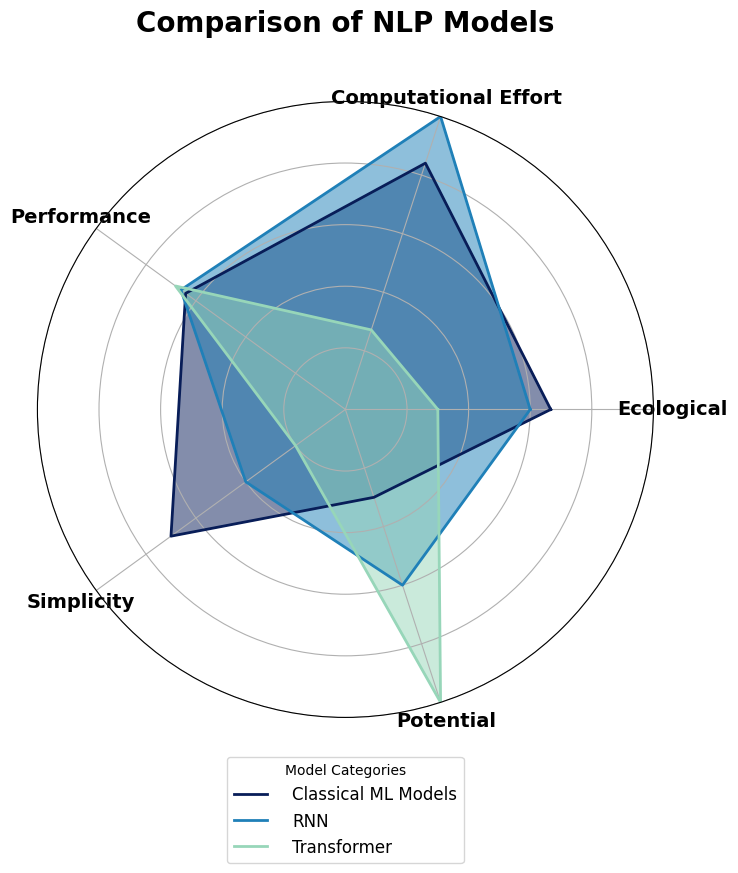

In [11]:
# Define the metrics to plot
metrics = ['Ecological', 'Computational Effort', 'Performance', 'Simplicity', 'Potential']

# Create the radar chart
create_radar_chart(summary_data, metrics, 'Comparison of NLP Models')

In [12]:
# End time
end_time = time.time()
total_time = end_time - start_time

print(f"Total runtime of the notebook: {total_time:.2f} seconds")

Total runtime of the notebook: 0.46 seconds


And here again we want to calculate the best performing model for each performance metric but also used representative technique.

In [13]:
# Comparing all models and their performance regarding the applied techniques
# We load all xlsx files and compare the results
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load all results xlsx files
df_tfidf = pd.read_excel('results_combined_tdidf.xlsx')
df_wordembedding = pd.read_excel('results_combined_wordembedding.xlsx')
df_bow = pd.read_excel('results_combined_bow.xlsx')

# Add a column to indicate the technique
df_tfidf['Technique'] = 'TF-IDF'
df_wordembedding['Technique'] = 'Word Embedding'
df_bow['Technique'] = 'Bag of Words'

# Combine the results into a single DataFrame
results_combined = pd.concat([df_tfidf, df_wordembedding, df_bow], ignore_index=True)

# Function to find the best model based on a specific metric
def find_best_model(df, metric):
    best_model = df.loc[df[metric].idxmax()]
    return best_model

# Find the best model based on Accuracy, ROC AUC, and F1 Score
best_accuracy_model = find_best_model(results_combined, 'Accuracy')
best_roc_auc_model = find_best_model(results_combined, 'ROC AUC')
best_f1_score_model = find_best_model(results_combined, 'F1 Score')

print("Best Model based on Accuracy:")
print(best_accuracy_model)
print("\nBest Model based on ROC AUC:")
print(best_roc_auc_model)
print("\nBest Model based on F1 Score:")
print(best_f1_score_model)

Best Model based on Accuracy:
Model        XGBoost (Optimized)
Accuracy                0.751634
ROC AUC                 0.651594
F1 Score                0.728274
Technique           Bag of Words
Name: 21, dtype: object

Best Model based on ROC AUC:
Model        Naive Bayes (Optimized)
Accuracy                    0.699346
ROC AUC                     0.664938
F1 Score                    0.703292
Technique                     TF-IDF
Name: 3, dtype: object

Best Model based on F1 Score:
Model        XGBoost (Optimized)
Accuracy                0.751634
ROC AUC                 0.651594
F1 Score                0.728274
Technique           Bag of Words
Name: 21, dtype: object


In [14]:
# Combine the results into a single DataFrame for classic models
results_combined_classicmodels = pd.concat([df_tfidf, df_wordembedding, df_bow], ignore_index=True)

# Combine the results into a single DataFrame for RNN and Transformer models
results_combined_rnn_transformer = pd.concat([df_rnn, df_bert], ignore_index=True)

# Calculate the overall performance score as the average of Accuracy, ROC AUC, and F1 Score for classic models
results_combined_classicmodels['Performance'] = results_combined_classicmodels[['Accuracy', 'ROC AUC', 'F1 Score']].mean(axis=1)

# Calculate the overall performance score as the average of Accuracy, ROC AUC, and F1 Score for RNN and Transformer models
results_combined_rnn_transformer['Performance'] = results_combined_rnn_transformer[['Accuracy', 'ROC AUC', 'F1 Score']].mean(axis=1)

# Function to find the best model based on the overall performance score for each technique
def find_best_model_per_technique(df):
    best_models = df.loc[df.groupby('Technique')['Performance'].idxmax()]
    return best_models

# Find the best model for each technique based on the overall performance score for classic models
best_models_per_technique_classic = find_best_model_per_technique(results_combined_classicmodels)

# Find the best model for each technique based on the overall performance score for RNN and Transformer models
best_models_per_technique_rnn_transformer = find_best_model_per_technique(results_combined_rnn_transformer)

In [15]:
print("Best Models based on Overall Performance Score for each Technique (Classic Models):")
best_models_per_technique_classic

Best Models based on Overall Performance Score for each Technique (Classic Models):


,Model,Accuracy,ROC AUC,F1 Score,Technique,Performance
21,XGBoost (Optimized),0.751634,0.651594,0.728274,Bag of Words,0.710501
3,Naive Bayes (Optimized),0.699346,0.664938,0.703292,TF-IDF,0.689192
19,Logistic Regression (Optimized),0.725490,0.623451,0.701094,Word Embedding,0.683345


In [16]:
print("\nBest Models based on Overall Performance Score for each Technique (RNN and Transformer Models):")
best_models_per_technique_rnn_transformer


Best Models based on Overall Performance Score for each Technique (RNN and Transformer Models):


,Model,Accuracy,F1 Score,ROC AUC,Technique,Ecological,Computational Effort,Potential,Performance
8,Bi-LSTM with GloVe,0.716954,0.686974,0.727708,RNN,0.6,316.22,0.6,0.710546
17,distilroberta-base-5-epochs,0.727143,0.686144,0.691041,Transformer,0.3,3000.00,1.0,0.701442


We note that the results are quite different and unique. In the Bag of Words (BOW) approach, the optimized XGBoost model performs best, while the optimized Naive Bayes model seems to be better when used in combination with TF-IDF. Additionally, it is worth mentioning that the optimized logistic regression model fits best on the Word2Vec word embedding model from Google, achieving the highest performance in this selected technique.

Regarding RNNs, it is evident that in overall performance, the Bi-LSTM in combination with GloVe performs better than all other remaining RNNs and their various embeddings, such as FastText or Word2Vec.

Regarding the transformer models, we note that distilroberta-base without fine-tuning outperforms the other transformer models, even those with more epochs. Interestingly, the model with 5 epochs performs better, which seems to be the case because we have a small dataset, and longer epochs are more beneficial for larger datasets.